In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv(r"diabetes.csv")

In [97]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
df.drop(columns=['Pregnancies', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],inplace=True)

In [103]:
df

,Glucose,BloodPressure,Insulin,Outcome
0,148,72,0,1
1,85,66,0,0
2,183,64,0,1
3,89,66,94,0
4,137,40,168,1
...,...,...,...,...
763,101,76,180,0
764,122,70,0,0
765,121,72,112,0
766,126,60,0,1


C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_10992\2537106076.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=1)


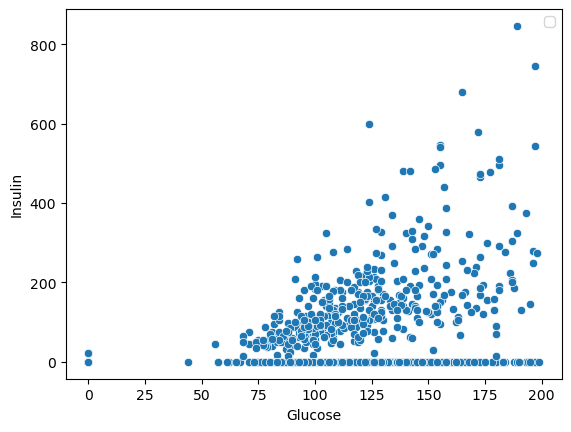

In [105]:
sns.scatterplot(x="Glucose", y="Insulin", data=df, hue_norm="placed")
plt.legend(loc=1)
plt.show()

In [155]:
x = df.iloc[:,:-1]
y = df["Outcome"]
x

,Glucose,BloodPressure,Insulin
0,148,72,0
1,85,66,0
2,183,64,0
3,89,66,94
4,137,40,168
...,...,...,...
763,101,76,180
764,122,70,0
765,121,72,112
766,126,60,0


In [157]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [161]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr = LogisticRegression()

In [165]:
lr.fit(x_train, y_train)

LogisticRegression()

In [167]:
lr.score(x_test, y_test)*100

74.02597402597402

In [169]:
lr.predict([[148, 72, 0]])

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [171]:
lr.predict([[85, 66, 0]])

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [173]:
from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

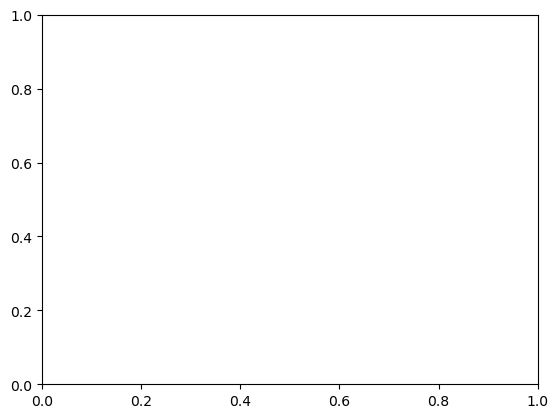

In [177]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

In [179]:
lr.coef_

array([[ 0.03874348, -0.00537108, -0.00068484]])

In [181]:
lr.intercept_

array([-5.00229772])